# 1. Analyze Synchronized freezing

---
## 1-1. Compute %_overlapped_freezing & Cohen_D

**Tasks:**
1. Read CSV files from subholders, and output "summary.csv"
2. Compute %_freezing and %_overlapped_freezing, and output to "summary1.csv"
3. Compute permutation/Cohen_D and store in DF, and output to "summary2.csv"
4. Compute lag times, and output to "summary3.csv"

**Requirements:**
    
Set path to the root folder, which contains multiple experiment folders. Each experiment folder
contains CSV files, which describe freezing onset and offset for two subjects.

**Output sumary2.csv file format:**

|Foldername_videoname|single_animal|fz_start_sub1|fz_end_sub1|fz_start_sub2|fz_end_sub2|fz_sub1|fz_sub2|fz_overlap|cohen_d|lagt_start_s1_s2|lagt_start_s2_s1|lagt_end_s1_s2|lagt_end_s2_s1|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|str|bool|int array|int array|int array|int array|float|float|float|float|int array|int array|int array|int array|

**It would take 2:30.**



In [1]:
#############################################
# Specify the folder
path = r"W:\videos_synchrony"
#path = r"W:\wataru\working_can_delete"
#path = r"C:\Users\User\Desktop\test"
#############################################
import synchro_freeze as sf
import traceback
import os

DEBUG = False
#DEBUG = True
df, df_traj = sf.process_freeze(path,DEBUG)

Step1. Reading CSV files from subfolders.
	Processing directory:  20190408_testing_1,  	Reading f10ab_track_freeze.csv
	Reading f6ab_track_freeze.csv
	Reading f8ab_track_freeze.csv
	Reading m10ab_track_freeze.csv
	Reading m6ab_track_freeze.csv
	Reading m8ab_track_freeze.csv
20190408_testing_2,  	Reading f11ab_track_freeze.csv
	Reading f7ab_track_freeze.csv
	Reading f9ab_track_freeze.csv
	Reading m7ab_track_freeze.csv
	Reading m9ab_track_freeze.csv
20190520_test1,  	Reading f12ab_track_freeze.csv
	Reading f13ab_track_freeze.csv
	Reading f17ab_track_freeze.csv
	Reading m13ab_track_freeze.csv
20190520_test2,  	Reading f14ab_track_freeze.csv
	Reading f15ab_track_freeze.csv
	Reading f16ab_track_freeze.csv
	Reading m11ab_track_freeze.csv
	Reading m12ab_track_freeze.csv
20190611_afternoon,  	Reading f19af21b_track_freeze.csv
	Reading f19bf21a_track_freeze.csv
	Reading f23af25b_track_freeze.csv
	Reading f23bf25a_track_freeze.csv
	Reading m14ab_track_freeze.csv
	Reading m17ab_track_freeze.csv
	

---
## 1-2. Display freezing overlap in specific experiment
### Resulting figure will be output as overlap_fig.eps

In [2]:
print("We found the following Foldername_videoname.\n")
for i in range (0, len(df)):
    print("\t", i, df.iloc[i,0])

print("\nSelect the Foldername_videoname ID number and run the next cell")

We found the following Foldername_videoname.

	 0 20190408_testing_1_7a
	 1 20190408_testing_1_7b
	 2 20190408_testing_1_9a
	 3 20190408_testing_1_9b
	 4 20190408_testing_1_f10ab
	 5 20190408_testing_1_f11a
	 6 20190408_testing_1_f11b
	 7 20190408_testing_1_f6ab
	 8 20190408_testing_1_f7a
	 9 20190408_testing_1_f7b
	 10 20190408_testing_1_f8ab
	 11 20190408_testing_1_f9a
	 12 20190408_testing_1_f9b
	 13 20190408_testing_1_m10ab
	 14 20190408_testing_1_m6ab
	 15 20190408_testing_1_m8ab
	 16 20190408_testing_2_f10a
	 17 20190408_testing_2_f10b
	 18 20190408_testing_2_f11ab
	 19 20190408_testing_2_f6a
	 20 20190408_testing_2_f6b
	 21 20190408_testing_2_f7ab
	 22 20190408_testing_2_f8a
	 23 20190408_testing_2_f8b
	 24 20190408_testing_2_f9ab
	 25 20190408_testing_2_m10a
	 26 20190408_testing_2_m10b
	 27 20190408_testing_2_m6a
	 28 20190408_testing_2_m6b
	 29 20190408_testing_2_m7ab
	 30 20190408_testing_2_m8a
	 31 20190408_testing_2_m8b
	 32 20190408_testing_2_m9ab
	 33 20190520_test1_f12a

Folder name: 20191016_m40
Animal1 freeze : 57.708333
Animal2 freeze : 34.375000
Overlap freeze : 25.208333


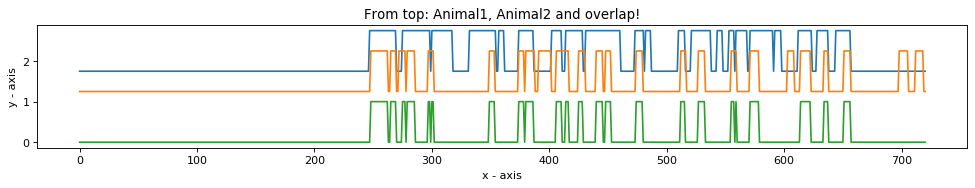

In [3]:
folderID = 150
output = True
video_system = 'FreezeFrame'

(a,b,c,d) = sf.overlap_freezing(df.iloc[folderID,:], video_system, path, output)

---
## 1-3. Display trajectories in specific experiment
### Resulting figure will be output as overlap_fig.epsm

Heatmap
https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set
Colormap
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html



In [5]:
# import synchro_freeze as sf
# import os
# import pandas as pd
# import numpy as np

# # read summary4.csv and summary_traj.csv
# path = r"W:\videos_synchrony"

# columnName_traj_sub = list(map(str,list(range(0,722))))
# columnName_traj = ['id','sub_id'] + columnName_traj_sub
# columnType_traj = ['str','str'] + ['float']*722

# df_traj = sf.read_csv2pd(path,'summary_traj.csv', columnName_traj, columnType_traj)

# filename = 'summary4.csv'
# inputFilename = os.path.join(path,filename)
# df = pd.read_csv(inputFilename,index_col=False)

# compute unique id in df_traf
id_list = df_traj.id.unique()
for i in range(len(id_list)):
    print(i,": ",id_list[i])

0 :  20190408_testing_1_f10ab
1 :  20190408_testing_1_f6ab
2 :  20190408_testing_1_f8ab
3 :  20190408_testing_1_m10ab
4 :  20190408_testing_1_m6ab
5 :  20190408_testing_1_m8ab
6 :  20190408_testing_2_f11ab
7 :  20190408_testing_2_f7ab
8 :  20190408_testing_2_f9ab
9 :  20190408_testing_2_m7ab
10 :  20190408_testing_2_m9ab
11 :  20190520_test1_f12ab
12 :  20190520_test1_f13ab
13 :  20190520_test1_f17ab
14 :  20190520_test1_m13ab
15 :  20190520_test2_f14ab
16 :  20190520_test2_f15ab
17 :  20190520_test2_f16ab
18 :  20190520_test2_m11ab
19 :  20190520_test2_m12ab
20 :  20190611_afternoon_f19af21b
21 :  20190611_afternoon_f19bf21a
22 :  20190611_afternoon_f23af25b
23 :  20190611_afternoon_f23bf25a
24 :  20190611_afternoon_m14ab
25 :  20190611_afternoon_m17ab
26 :  20190611_afternoon_m18ab
27 :  20190611_morning_f18af20b
28 :  20190611_morning_f18bf20a
29 :  20190611_morning_f22af24b
30 :  20190611_morning_f22bf24a
31 :  20190611_morning_m15ab
32 :  20190611_morning_m16ab
33 :  20190809_afte

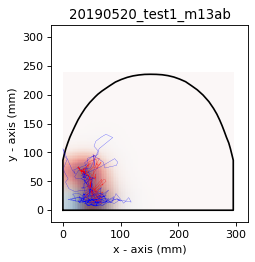

In [6]:
start,end = 240,722
linewidth = 0.2
sigma = 8

i = 14
sf.plot_traj(df_traj, id_list,i,start,end,linewidth,sigma)

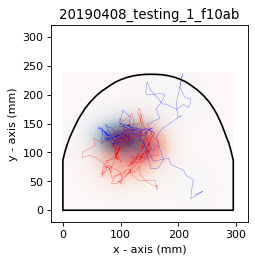

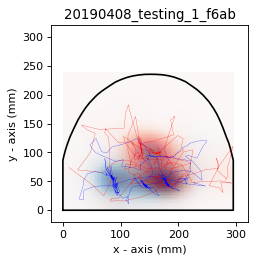

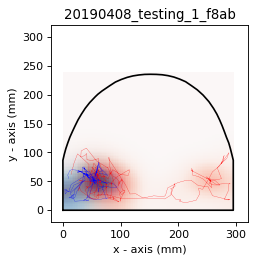

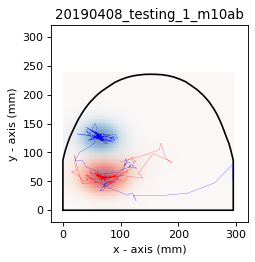

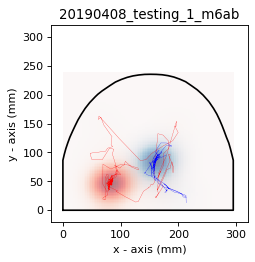

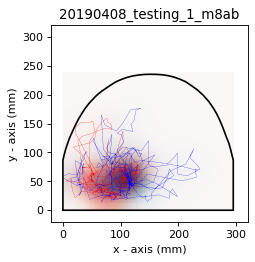

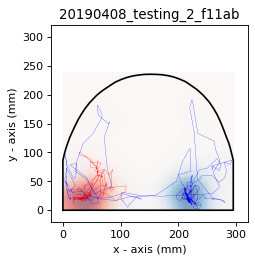

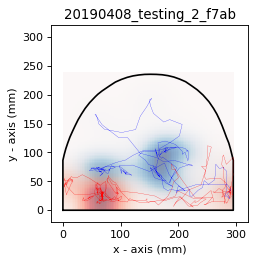

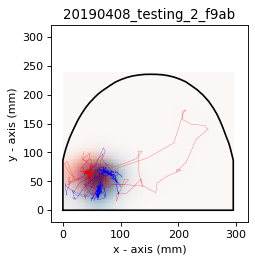

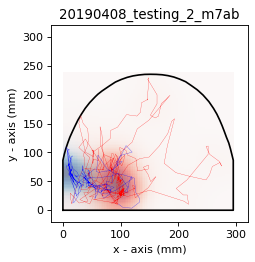

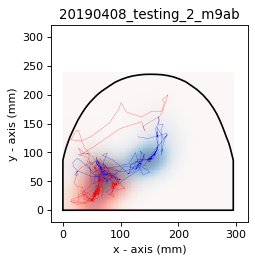

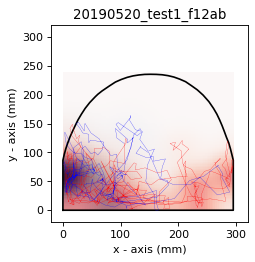

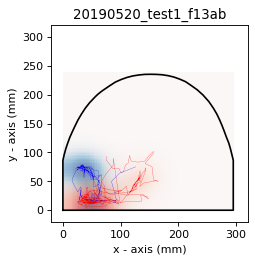

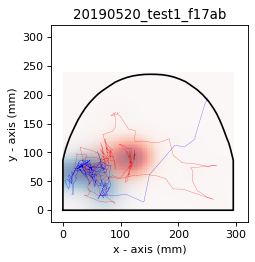

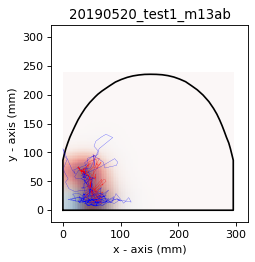

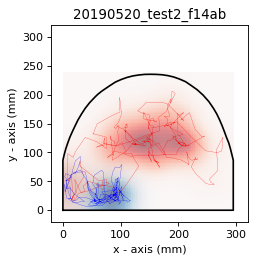

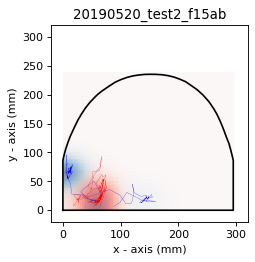

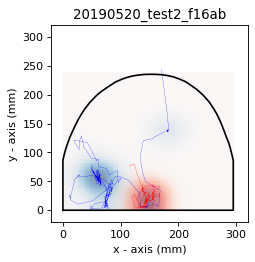

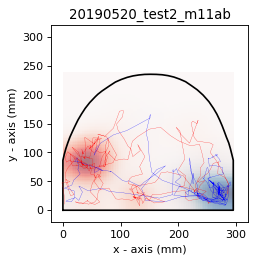

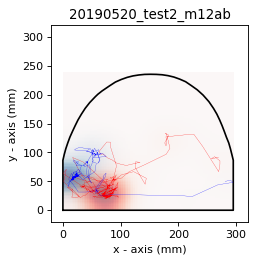

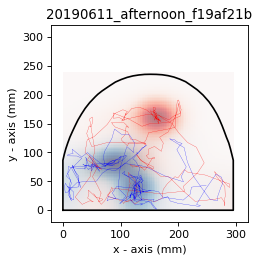

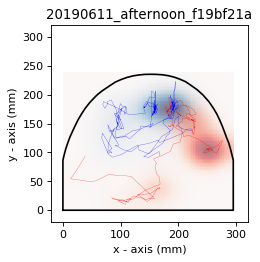

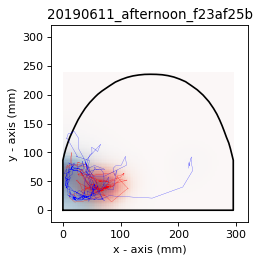

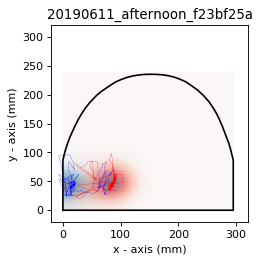

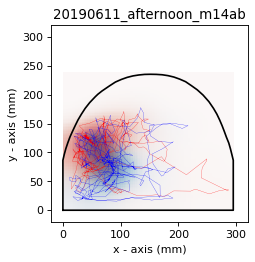

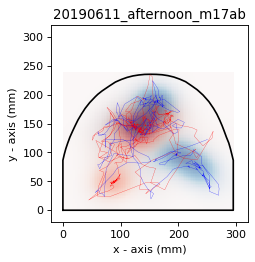

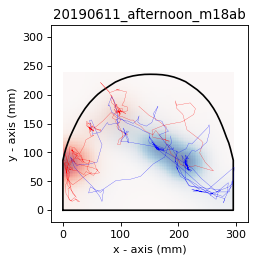

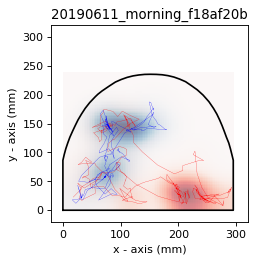

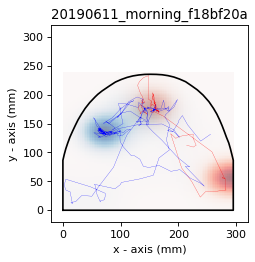

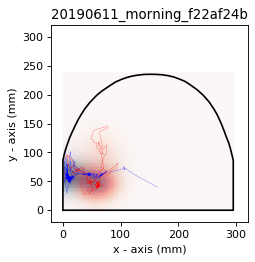

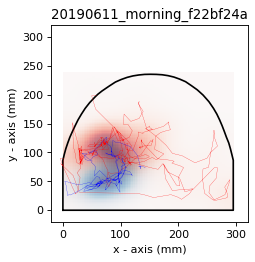

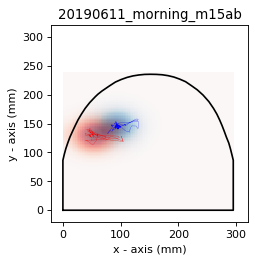

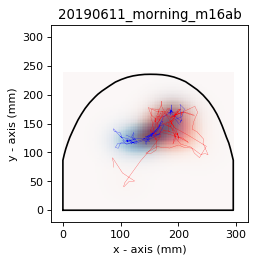

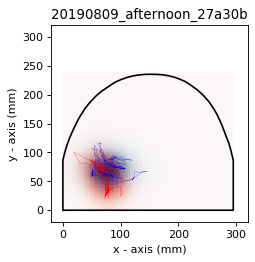

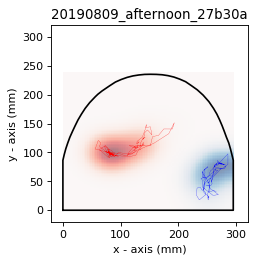

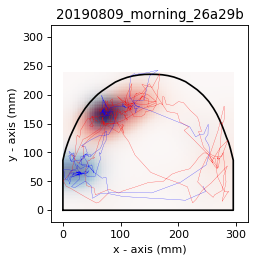

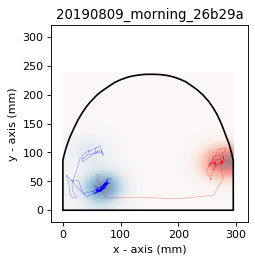

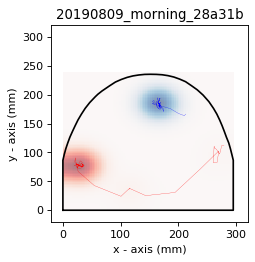

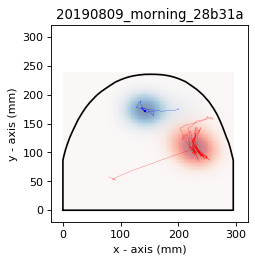

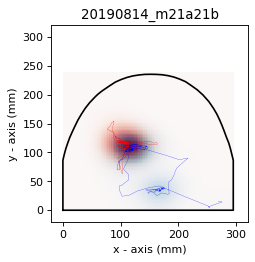

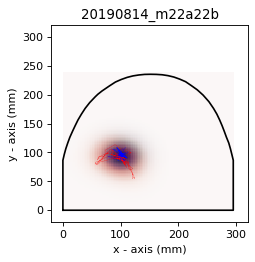

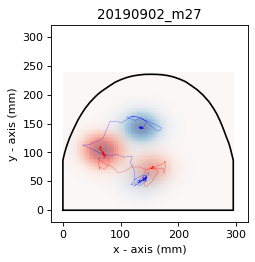

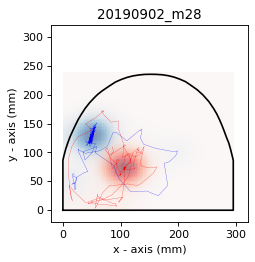

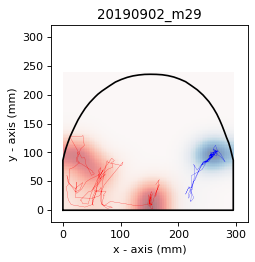

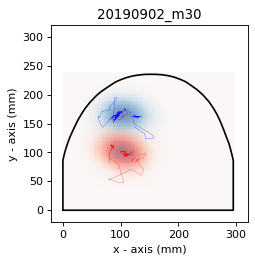

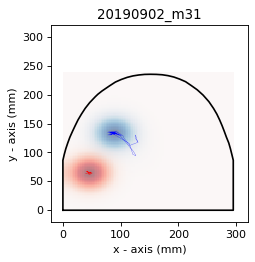

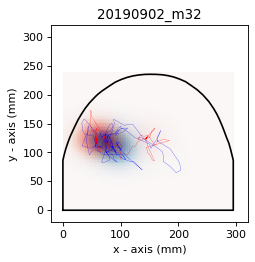

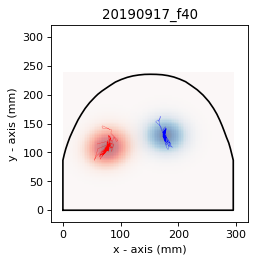

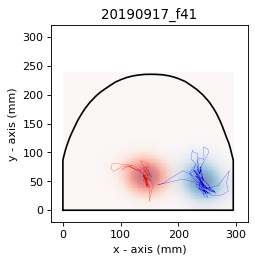

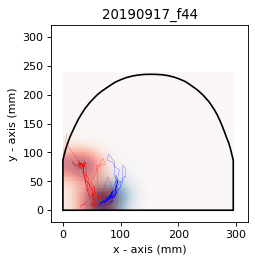

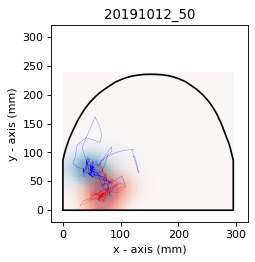

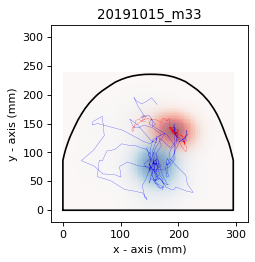

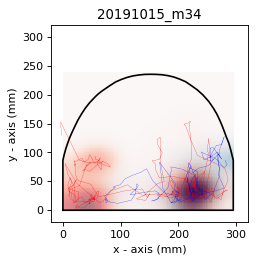

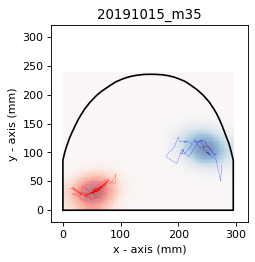

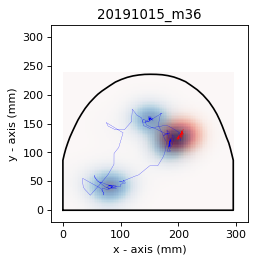

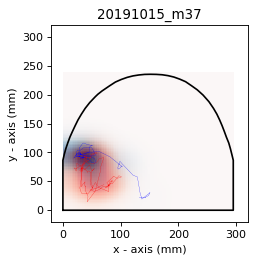

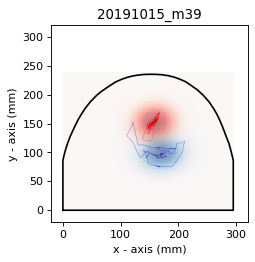

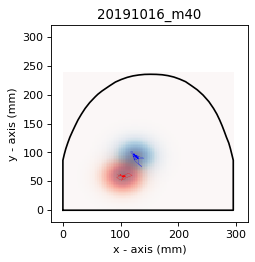

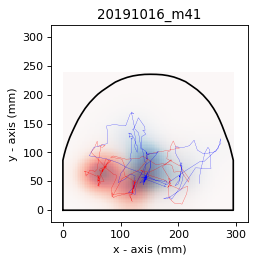

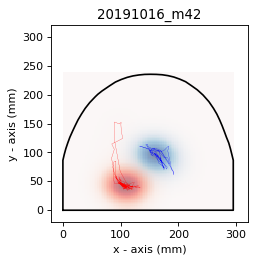

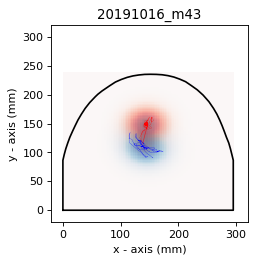

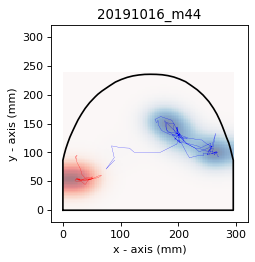

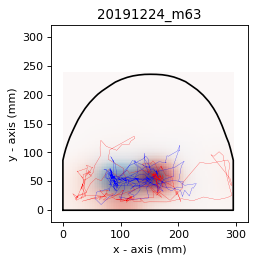

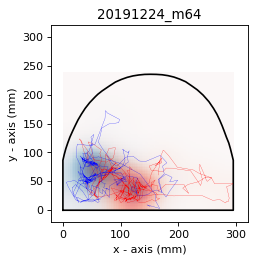

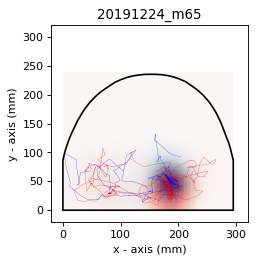

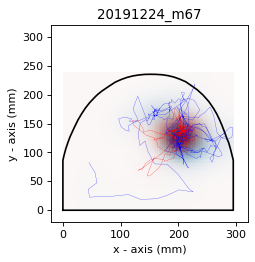

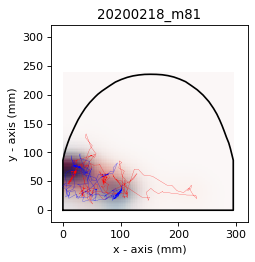

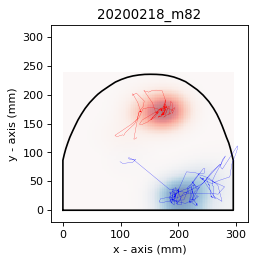

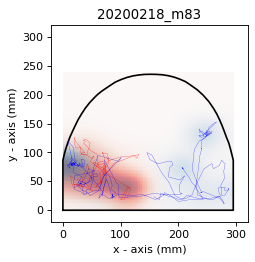

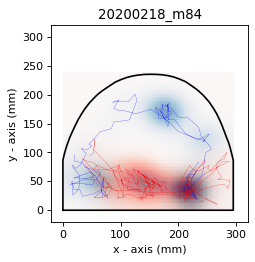

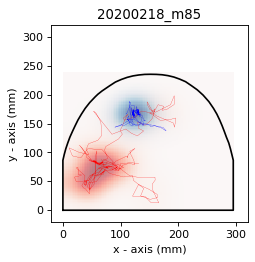

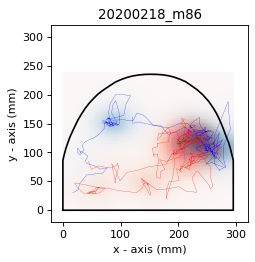

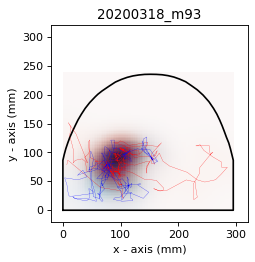

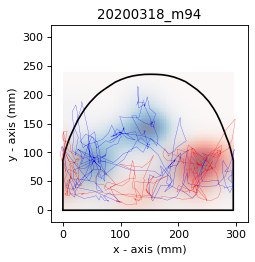

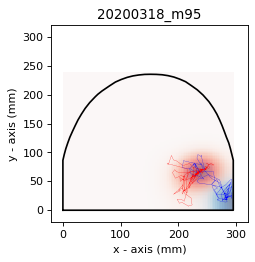

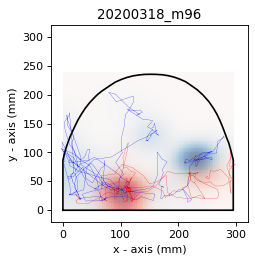

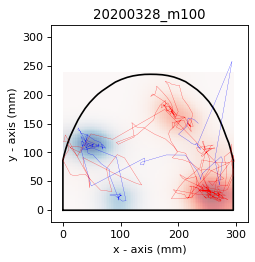

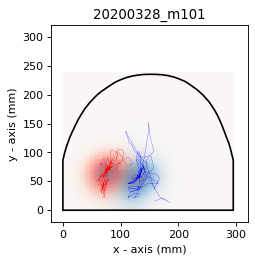

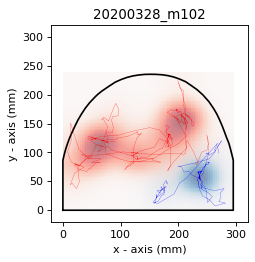

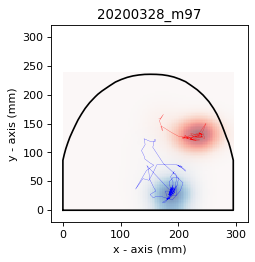

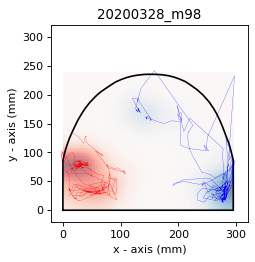

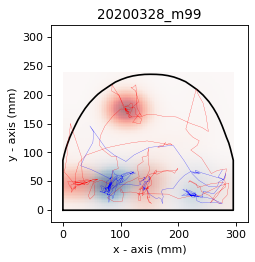

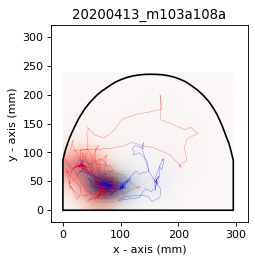

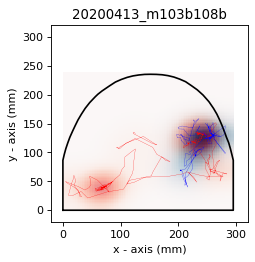

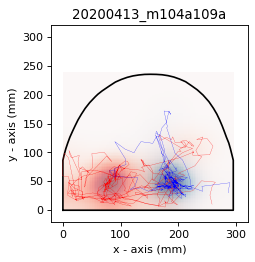

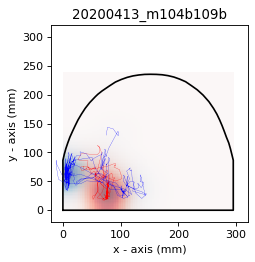

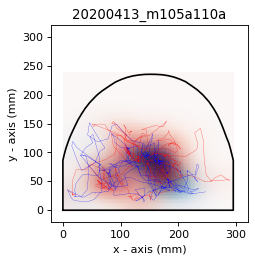

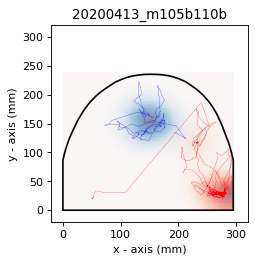

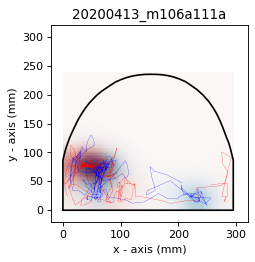

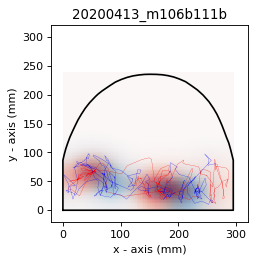

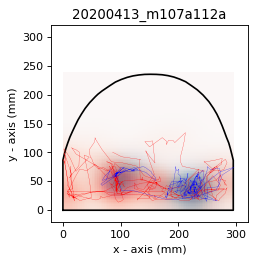

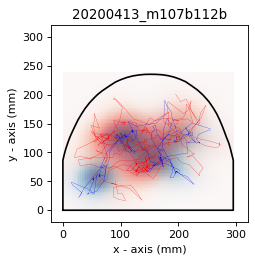

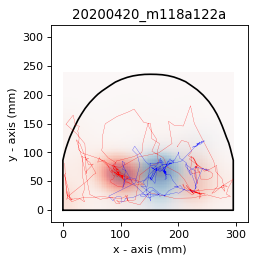

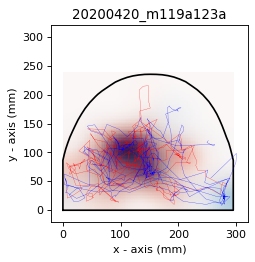

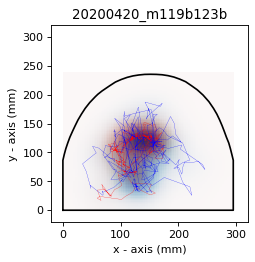

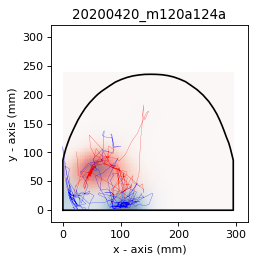

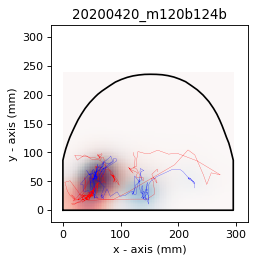

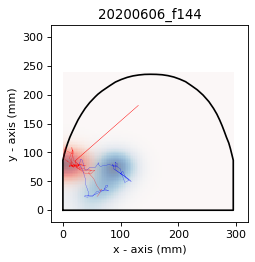

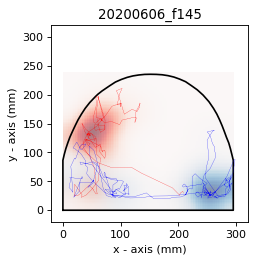

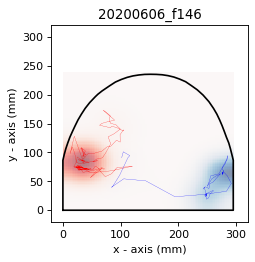

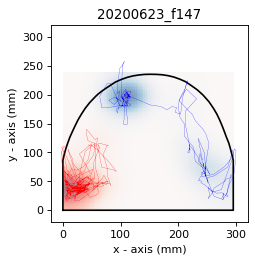

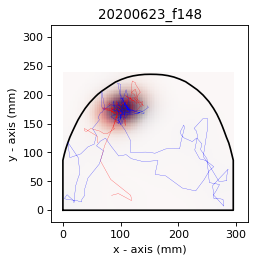

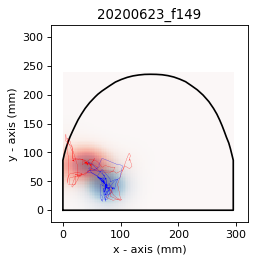

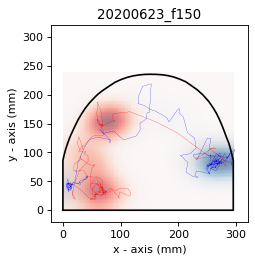

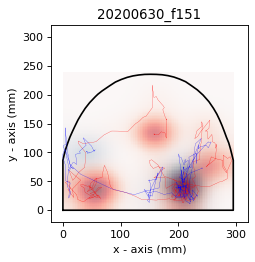

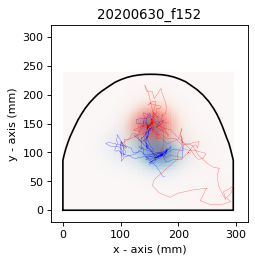

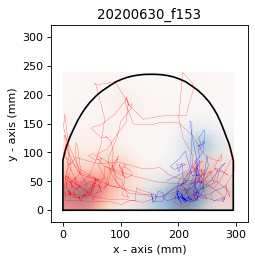

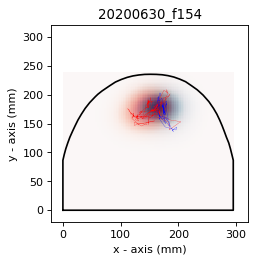

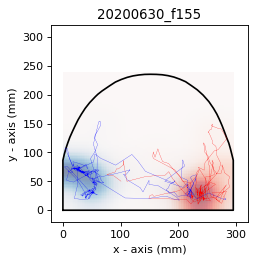

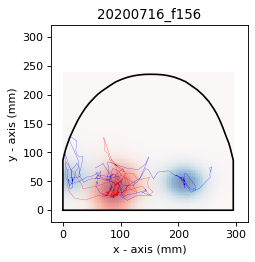

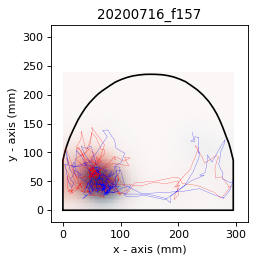

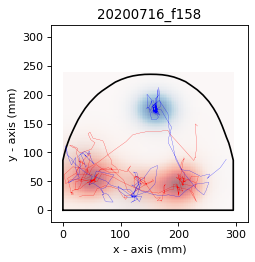

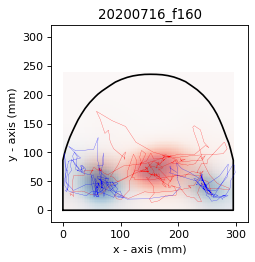

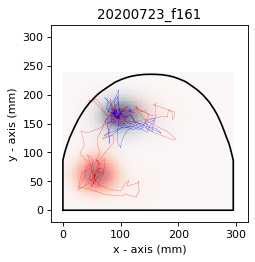

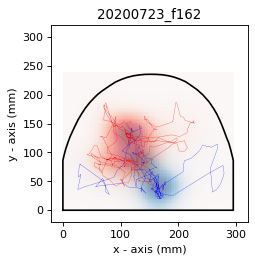

In [7]:
for i in range(len(id_list)):
    sf.plot_traj(df_traj, id_list,i,start,end,linewidth,sigma)

---
## 1-3. Test the significance of overlapped freezing by permutation
1. Calculate overlapped freezing by permutating relative freezing dynamics between the two animals. <br>
    1K sampling of % overlapped freezing from the permutation will be stored as "test1.csv".
2. One-Sample Wilcoxon Signed Rank Test in R using the "r-codes" notebook.<br>
http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r